In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%ls

sample_data/  test.csv  train.csv


In [ ]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
dataset = pd.concat(objs=[train,test],axis=0).reset_index(drop=True)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Printing shapes of dataset
print(train.shape)
print(test.shape)
print(dataset.shape)

(891, 12)
(418, 11)
(1309, 12)


Filling missing values with np.nan


In [ ]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Embarked has 2 Missing Values <br>
Age has 263 Missing values <br>
Cabin Has 1014 Missing Values

## Filling Missing Values
        

In [ ]:
dataset.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
# Filling the missing values with frequently Occured 'S' boarding point
dataset.Embarked.fillna(value = 'S',inplace=True)

In [ ]:
dataset.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
type(dataset.Age)

pandas.core.series.Series

In [ ]:
#Filling Missing Values of Age with median.
dataset['Age'] = dataset.Age.fillna(dataset.Age.median())

In [ ]:
dataset['Age']

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    28.0
1305    39.0
1306    38.5
1307    28.0
1308    28.0
Name: Age, Length: 1309, dtype: float64

There are 1017 Missing Values in Cabin Column, so I am dropping the column from the dataset

In [ ]:
dataset.drop(labels='Cabin',axis=1,inplace=True)

## Data Preprocessing & Feature Transforms

In [ ]:
dataset['Sex'] = dataset.Sex.map({'male':1,'female':0})

In [ ]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,28.0,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",1,28.0,0,0,359309,8.0500,S


In [ ]:
#dropping ticket information
dataset = dataset.drop('Ticket',axis=1)

In [ ]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,28.0,0,0,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",1,28.0,0,0,8.0500,S


In [ ]:
dataset = dataset.drop('PassengerId',axis=1)

In [ ]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S


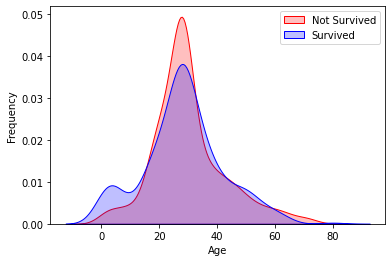

In [ ]:
#Plot a distribution Plot for Survivors and Non-Survivors Based on Age
g = sns.kdeplot(dataset["Age"][(dataset["Survived"] == 0)], color="Red", shade = True)
g = sns.kdeplot(dataset["Age"][(dataset["Survived"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

In [ ]:
def discretize_age(Age):
    if(Age<=1.0):
        return 1
    elif(Age<=5.0):
        return 2
    elif(Age<=10.0):
        return 3
    elif(Age<=20.0):
        return 4
    elif(Age<=40.0):
        return 5
    elif(Age<=60.0):
        return 6
    else:
        return 7

In [ ]:
dataset['Age'] = list(map(discretize_age,dataset['Age']))
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",1,5,1,0,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5,1,0,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",0,5,0,0,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,5,1,0,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",1,5,0,0,8.0500,S


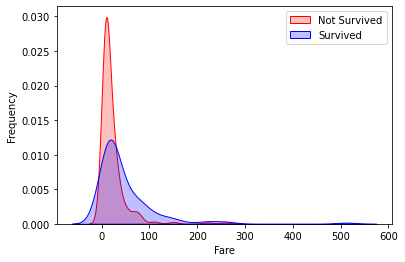

In [ ]:
g = sns.kdeplot(dataset["Fare"][(dataset["Survived"] == 0)], color="Red", shade = True)
g = sns.kdeplot(dataset["Fare"][(dataset["Survived"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("Fare")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

In [ ]:
dataset.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [ ]:
def discretize_Fare(Fare):
    if (Fare<= 7):
        return 1
    elif(Fare<=15.0):
        return 2
    elif(Fare<=30.0):
        return 3
    elif(Fare<=75.0):
        return 4
    elif(Fare<=100.0):
        return 5
    else:
        return 6

In [ ]:
dataset['Fare'] = list(map(discretize_age,dataset['Fare']))
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",1,5,1,0,3,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5,1,0,7,C
2,1.0,3,"Heikkinen, Miss. Laina",0,5,0,0,3,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,5,1,0,6,S
4,0.0,3,"Allen, Mr. William Henry",1,5,0,0,3,S


In [ ]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [ ]:
dataset.drop('Name',axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,1,5,1,0,3,S,Mr
1,1.0,1,0,5,1,0,7,C,Mrs
2,1.0,3,0,5,0,0,3,S,Miss
3,1.0,1,0,5,1,0,6,S,Mrs
4,0.0,3,1,5,0,0,3,S,Mr
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,5,0,0,3,S,Mr
1305,NaN,1,0,5,0,0,7,C,Dona
1306,NaN,3,1,5,0,0,3,S,Mr
1307,NaN,3,1,5,0,0,3,S,Mr


In [ ]:
dataset.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
#Convert Embarked to integers
dataset['Embarked'] = dataset['Embarked'].map({'S':2,'C':1,'Q':0})

In [ ]:
# Convert to categorical values Title 
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

In [ ]:
dataset.drop('Name',axis=1,inplace=True)

In [ ]:
test = dataset[dataset['Survived'].isna()].drop('Survived',axis=1)
train = dataset[~dataset['Survived'].isna()]

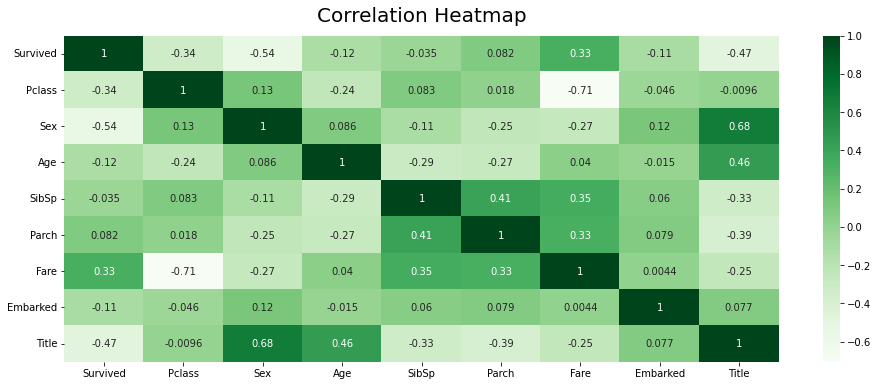

In [ ]:
plt.figure(figsize=(16, 6))
heatmap =sns.heatmap(train.corr(), annot = True, cmap= 'Greens')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':20}, pad =14);

In [ ]:
Y = train['Survived']
X = train.drop(['Survived'],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,5,1,0,3,2,2
1,1,0,5,1,0,7,1,1
2,3,0,5,0,0,3,2,1
3,1,0,5,1,0,6,2,1
4,3,1,5,0,0,3,2,2
...,...,...,...,...,...,...,...,...
886,2,1,5,0,0,4,2,3
887,1,0,4,0,0,5,2,1
888,3,0,5,1,2,5,2,1
889,1,1,5,0,0,5,1,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=41)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 8)
(268, 8)
(623,)
(268,)


In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif
train_new=SelectKBest(score_func=f_classif,k=7).fit(X_train,y_train)

In [ ]:
train_new_scores = pd.DataFrame(train_new.scores_)
train_new_columns = pd.DataFrame(X_train.columns)
feature_scores = pd.concat([train_new_columns, train_new_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  
print(feature_scores.nlargest(7,'Score')) 

  Feature_Name       Score
1          Sex  212.668337
7        Title  137.987264
0       Pclass   89.785031
5         Fare   78.378812
2          Age   11.080664
6     Embarked    8.084573
3        SibSp    2.513001


In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,1,5,1,0,3,2,2
1,1.0,1,0,5,1,0,7,1,1
2,1.0,3,0,5,0,0,3,2,1
3,1.0,1,0,5,1,0,6,2,1
4,0.0,3,1,5,0,0,3,2,2


## Building a Support Vector Classifier

In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import StratifiedKFold

In [ ]:
clf = SVC(degree=2)

In [ ]:
params = {'C':[0.001,0.01,0.1,0.5,1.0,5,10,100],'kernel':['linear','rbf','poly']}

In [ ]:
gridSearch = GridSearchCV(estimator=clf,param_grid=params,cv=StratifiedKFold(n_splits=5))

In [ ]:
gridSearch.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=2,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1.0, 5, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gridSearch.best_params_


{'C': 10, 'kernel': 'rbf'}

In [ ]:
clf = SVC(C=10,kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Classification Report")
print(classification_report(y_test,y_pred))
SVM_acc = accuracy_score(y_test,y_pred)
print("Accuracy of the classification is ", accuracy_score(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       162
         1.0       0.89      0.70      0.78       106

    accuracy                           0.85       268
   macro avg       0.86      0.82      0.83       268
weighted avg       0.85      0.85      0.84       268

Accuracy of the classification is  0.8470149253731343


## CONCLUSION

### RBF Kernel is better than linear and quadratic kernel
### Accuracy of the classification is 84.70 %